In [1]:
import env
import pandas as pd
import utilities as utils
import matplotlib.pyplot as plt
import seaborn as sns

from wrangle_census import wrangle_census_df
from scipy import stats
from model import generate_baseline_model, generate_regression_model
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor

In [99]:
census_df = pd.read_csv(env.data_path + '/census/census-income.data', delimiter=',', header=None)
census_test_df = pd.read_csv(env.data_path + '/census/census-income.test', delimiter=',', header=None)

In [100]:
census_df = pd.concat([census_df, census_test_df])

census_df.shape

(299285, 42)

In [24]:
income_df.head(5).T

,0,1,2,3,4
0,73,58,18,9,10
1,Not in universe,Self-employed-not incorporated,Not in universe,Not in universe,Not in universe
2,0,4,0,0,0
3,0,34,0,0,0
4,High school graduate,Some college but no degree,10th grade,Children,Children
5,0,0,0,0,0
6,Not in universe,Not in universe,High school,Not in universe,Not in universe
7,Widowed,Divorced,Never married,Never married,Never married
8,Not in universe or children,Construction,Not in universe or children,Not in universe or children,Not in universe or children
9,Not in universe,Precision production craft & repair,Not in universe,Not in universe,Not in universe


In [101]:
column_name_dictionary = {0 : 'age', 1 : 'worker_class', 2 : 'drop_1', 3 : 'drop_2', 4 : 'education',\
                         5 : 'hourly_wage', 6 : 'highest_education', 7 : 'marital_status', 8 : 'major_industry_code',\
                         9 : 'major_occupation_code', 10 : 'race', 11 : 'of_hispanic_origin', 12 : 'sex', 13 : 'is_union_member',\
                         14 : 'unemployed_reason', 15 : 'employment_status', 16 : 'capital_gains', 17 : 'capital_losses',\
                         18 : 'total_dividends', 19 : 'tax_filer_status', 20 : 'region', 21 : 'state', 22 : 'family_status',\
                         23 : 'household_summary', 24 : 'drop_3', 25 : 'drop_4', 26 : 'drop_5', 27 : 'drop_6',\
                         28 : 'lived_in_house_last_year', 29 : 'drop_7', 30 : 'company_size', 31 : 'family_members_under_18',\
                         32 : 'country_of_father', 33 : 'country_of_mother', 34 : 'birth_country', 35 : 'citizenship',\
                         36 : 'is_self_employed', 37 : 'drop_8', 38 : 'drop_9', 39 : 'weeks_worked', 40 : 'year', 41 : 'drop_10'}

In [102]:
census_df.rename(columns=column_name_dictionary, inplace=True)

In [37]:
census_df.sample(14).T

,38049,65647,127574,90924,100321,182449,60586,51197,165338,17849,32036,97793,105011,153887
age,36,14,31,58,14,46,46,59,56,39,36,11,9,52
worker_class,Local government,Not in universe,Private,Not in universe,Not in universe,Private,Private,Private,Not in universe,Private,Federal government,Not in universe,Not in universe,Private
drop_1,43,0,4,0,0,16,29,33,0,21,29,0,0,33
drop_2,38,0,42,0,0,2,37,42,0,37,2,0,0,16
education,High school graduate,Children,High school graduate,High school graduate,Children,Bachelors degree(BA AB BS),10th grade,9th grade,11th grade,High school graduate,Some college but no degree,Children,Children,High school graduate
hourly_wage,0,0,0,0,0,0,0,0,0,0,0,0,0,0
highest_education,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe
marital_status,Married-civilian spouse present,Never married,Never married,Widowed,Never married,Never married,Married-civilian spouse present,Married-civilian spouse present,Separated,Married-civilian spouse present,Divorced,Never married,Never married,Married-civilian spouse present
major_industry_code,Education,Not in universe or children,Construction,Not in universe or children,Not in universe or children,Manufacturing-durable goods,Transportation,Retail trade,Not in universe or children,Manufacturing-nondurable goods,Transportation,Not in universe or children,Not in universe or children,Retail trade
major_occupation_code,Transportation and material moving,Not in universe,Handlers equip cleaners etc,Not in universe,Not in universe,Executive admin and managerial,Machine operators assmblrs & inspctrs,Handlers equip cleaners etc,Not in universe,Machine operators assmblrs & inspctrs,Executive admin and managerial,Not in universe,Not in universe,Sales


In [103]:
drop_cols = []
for col in census_df.columns:
    if "drop" in col:
        drop_cols.append(col)
        
drop_cols

census_df.drop(columns=drop_cols, inplace=True)

In [104]:
census_df = census_df[census_df.age >= 18]

census_df = census_df[census_df.weeks_worked == 52]

In [51]:
census_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,104663.0,40.184220,12.101598,18.0,31.0,39.0,48.0,90.0
hourly_wage,104663.0,115.634971,394.750886,0.0,0.0,0.0,0.0,9999.0
capital_gains,104663.0,951.076226,7056.793461,0.0,0.0,0.0,0.0,99999.0
capital_losses,104663.0,69.801898,362.970895,0.0,0.0,0.0,0.0,4356.0
total_dividends,104663.0,234.735828,2136.490863,0.0,0.0,0.0,0.0,99999.0
company_size,104663.0,3.910885,1.967256,1.0,2.0,4.0,6.0,6.0
is_self_employed,104663.0,0.275713,0.669786,0.0,0.0,0.0,0.0,2.0
weeks_worked,104663.0,52.000000,0.000000,52.0,52.0,52.0,52.0,52.0
year,104663.0,94.503435,0.499991,94.0,94.0,95.0,95.0,95.0


In [64]:
utils.nan_null_empty_check(census_df)

NaN values
Empty DataFrame
Columns: [rows, columns]
Index: []
--------------------------------
Empty values
Empty DataFrame
Columns: [rows, columns]
Index: []
--------------------------------


{'nan_positions': (array([], dtype=int64), array([], dtype=int64)),
 'empty_positions': (array([], dtype=int64), array([], dtype=int64))}

In [106]:
census_df.hourly_wage = census_df.hourly_wage / 100

In [108]:
census_df = census_df[census_df.hourly_wage > 0]

In [110]:
census_df.shape

(11377, 32)

In [111]:
# Standard 40 hour work week for 52 weeks
census_df['total_annual_income'] = (census_df.hourly_wage * 40 * 52) + census_df.total_dividends \
+ census_df.capital_gains - census_df.capital_losses

In [112]:
census_df.describe()

,age,hourly_wage,capital_gains,capital_losses,total_dividends,company_size,is_self_employed,weeks_worked,year,total_annual_income
count,11377.000000,11377.000000,11377.000000,11377.000000,11377.000000,11377.000000,11377.000000,11377.0,11377.000000,11377.000000
mean,38.512437,10.637869,396.746770,48.421904,101.718907,4.265536,0.283027,52.0,94.503296,22576.810266
std,12.134141,6.518728,3802.460418,301.362467,1029.626798,1.775528,0.681317,0.0,0.500011,14398.526859
min,18.000000,0.750000,0.000000,0.000000,0.000000,1.000000,0.000000,52.0,94.000000,79.000000
25%,29.000000,6.550000,0.000000,0.000000,0.000000,3.000000,0.000000,52.0,94.000000,13936.000000
50%,37.000000,9.000000,0.000000,0.000000,0.000000,4.000000,0.000000,52.0,95.000000,18913.000000
75%,47.000000,13.000000,0.000000,0.000000,0.000000,6.000000,0.000000,52.0,95.000000,27456.000000
max,90.000000,99.990000,99999.000000,3900.000000,42000.000000,6.000000,2.000000,52.0,95.000000,207979.200000


In [3]:
census_df = acquire_census_df()

In [3]:
census_df.shape

(299285, 42)

In [2]:
prepped_census_df = wrangle_census_df()

In [3]:
prepped_census_df.shape

(11377, 33)

In [3]:
train, test, validate = utils.split_dataframe_continuous_target(prepped_census_df, 'total_annual_income')

In [5]:
train.shape

(6370, 33)

In [6]:
validate.shape

(2731, 33)

In [7]:
test.shape

(2276, 33)

In [10]:
train.info()

string_cols = ['worker_class', 'education', 'highest_education', 'marital_status', 'major_industry_code', 'major_occupation_code',\
              'race', 'of_hispanic_origin', 'sex', 'is_union_member', 'unemployed_reason', 'employment_status', 'tax_filer_status',\
              'region', 'state', 'family_status', 'household_summary', 'lived_in_house_last_year', 'family_members_under_18',\
              'country_of_father', 'country_of_mother', 'birth_country', 'citizenship']

for col in string_cols:
    train[col] = train[col].str.strip()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6370 entries, 50080 to 42357
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       6370 non-null   int64  
 1   worker_class              6370 non-null   object 
 2   education                 6370 non-null   object 
 3   hourly_wage               6370 non-null   float64
 4   highest_education         6370 non-null   object 
 5   marital_status            6370 non-null   object 
 6   major_industry_code       6370 non-null   object 
 7   major_occupation_code     6370 non-null   object 
 8   race                      6370 non-null   object 
 9   of_hispanic_origin        6370 non-null   object 
 10  sex                       6370 non-null   object 
 11  is_union_member           6370 non-null   object 
 12  unemployed_reason         6370 non-null   object 
 13  employment_status         6370 non-null   object 
 14  cap

In [4]:
females = train[train.sex == "Female"]
females

,age,worker_class,education,hourly_wage,highest_education,marital_status,major_industry_code,major_occupation_code,race,of_hispanic_origin,...,company_size,family_members_under_18,country_of_father,country_of_mother,birth_country,citizenship,is_self_employed,weeks_worked,year,total_annual_income
50080,25,Private,High school graduate,8.00,Not in universe,Never married,Medical except hospital,Adm support including clerical,Black,All other,...,6,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,52,95,16640.0
26441,48,Private,High school graduate,4.25,Not in universe,Married-civilian spouse present,Retail trade,Other service,White,All other,...,6,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,52,94,8961.0
184270,20,Private,Some college but no degree,7.47,College or university,Never married,Manufacturing-nondurable goods,Machine operators assmblrs & inspctrs,Asian or Pacific Islander,All other,...,3,Not in universe,?,?,?,Foreign born- Not a citizen of U S,2,52,94,15537.6
4544,72,Private,Some college but no degree,9.00,Not in universe,Married-civilian spouse present,Wholesale trade,Adm support including clerical,White,All other,...,1,Not in universe,Italy,Italy,United-States,Native- Born in the United States,0,52,95,18810.0
21245,58,Private,High school graduate,8.75,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Adm support including clerical,White,All other,...,6,Not in universe,Poland,Poland,Poland,Foreign born- U S citizen by naturalization,0,52,94,18200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156550,44,Federal government,Bachelors degree(BA AB BS),22.81,Not in universe,Widowed,Public administration,Professional specialty,Black,All other,...,6,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,52,95,56058.8
45609,26,Private,Prof school degree (MD DDS DVM LLB JD),5.50,Not in universe,Never married,Education,Professional specialty,White,All other,...,6,Not in universe,United-States,United-States,United-States,Native- Born in the United States,2,52,94,11440.0
56876,56,Private,High school graduate,10.40,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Adm support including clerical,White,All other,...,4,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,52,94,21632.0
33112,44,Private,Some college but no degree,23.88,Not in universe,Widowed,Manufacturing-nondurable goods,Technicians and related support,White,All other,...,5,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,52,94,49670.4


In [5]:
cat_vars = ['worker_class', 'education', 'marital_status', 'major_occupation_code', 'race', 'is_union_member', 'region',\
            'state', 'sex']
cont_vars = ['age', 'hourly_wage', 'capital_gains', 'capital_losses', 'total_dividends', 'total_annual_income']

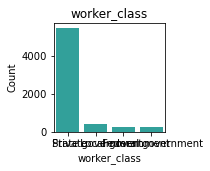

                            worker_class  Count  Percent
 Private                         Private   5440    85.40
 Local government       State government    425     6.67
 Federal government     Local government    265     4.16
 State government     Federal government    240     3.77
_________________________________________________________________


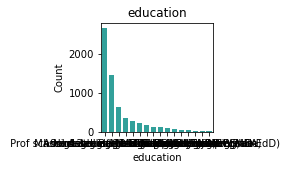

                                                                       education  \
 High school graduate                                       High school graduate   
 Some college but no degree               Prof school degree (MD DDS DVM LLB JD)   
 Bachelors degree(BA AB BS)                           Some college but no degree   
 Associates degree-occup /vocational                       12th grade no diploma   
 Associates degree-academic program          Associates degree-occup /vocational   
 11th grade                                                           11th grade   
 10th grade                               Masters degree(MA MS MEng MEd MSW MBA)   
 Masters degree(MA MS MEng MEd MSW MBA)                               10th grade   
 7th and 8th grade                            Associates degree-academic program   
 9th grade                                            Bachelors degree(BA AB BS)   
 5th or 6th grade                                              7th and 8th g

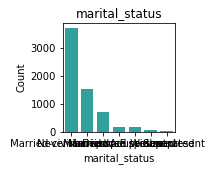

                                                    marital_status  Count  \
 Married-civilian spouse present                     Never married   3697   
 Never married                     Married-civilian spouse present   1548   
 Divorced                                                 Divorced    719   
 Separated                                   Married-spouse absent    177   
 Widowed                                Married-A F spouse present    158   
 Married-spouse absent                                     Widowed     51   
 Married-A F spouse present                              Separated     20   

                                  Percent  
 Married-civilian spouse present    58.04  
 Never married                      24.30  
 Divorced                           11.29  
 Separated                           2.78  
 Widowed                             2.48  
 Married-spouse absent               0.80  
 Married-A F spouse present          0.31  
_______________________________

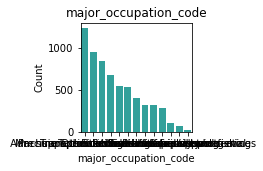

                                                         major_occupation_code  \
 Adm support including clerical                 Adm support including clerical   
 Precision production craft & repair                             Other service   
 Other service                             Precision production craft & repair   
 Machine operators assmblrs & inspctrs   Machine operators assmblrs & inspctrs   
 Professional specialty                                                  Sales   
 Sales                                      Transportation and material moving   
 Executive admin and managerial                Technicians and related support   
 Handlers equip cleaners etc                            Professional specialty   
 Transportation and material moving                        Protective services   
 Technicians and related support                Executive admin and managerial   
 Protective services                              Handlers equip cleaners etc    
 Farming forestr

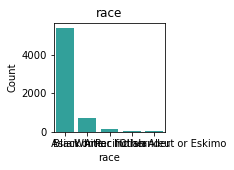

                                                      race  Count  Percent
 White                                               Black   5386    84.55
 Black                                               White    702    11.02
 Asian or Pacific Islander       Asian or Pacific Islander    157     2.46
 Other                                               Other     64     1.00
 Amer Indian Aleut or Eskimo   Amer Indian Aleut or Eskimo     61     0.96
_________________________________________________________________


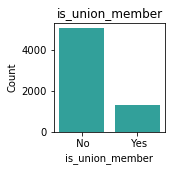

     is_union_member  Count  Percent
 No               No   5064     79.5
 Yes             Yes   1306     20.5
_________________________________________________________________


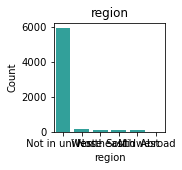

                            region  Count  Percent
 Not in universe   Not in universe   5903    92.67
 South                        West    150     2.35
 Midwest                 Northeast    129     2.03
 West                        South     94     1.48
 Northeast                 Midwest     92     1.44
 Abroad                     Abroad      2     0.03
_________________________________________________________________


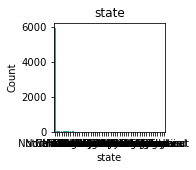

                                       state  Count  Percent
 Not in universe             Not in universe   5903    92.67
 California                       California     38     0.60
 Utah                         North Carolina     29     0.46
 ?                                   Florida     29     0.46
 Oklahoma                         New Mexico     24     0.38
 Florida                           Minnesota     24     0.38
 Indiana                                Utah     23     0.36
 North Carolina                        Maine     21     0.33
 Minnesota                          Missouri     18     0.28
 North Dakota                       Virginia     17     0.27
 Wyoming                                   ?     15     0.24
 New Mexico                             Ohio     15     0.24
 Michigan                      West Virginia     11     0.17
 Nevada                         South Dakota     11     0.17
 Missouri                             Abroad     10     0.16
 Maine                  

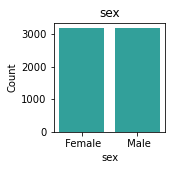

             sex  Count  Percent
 Female   Female   3186    50.02
 Male       Male   3184    49.98
_________________________________________________________________


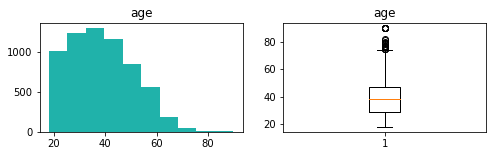

count    6370.000000
mean       38.540816
std        12.161019
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        90.000000
Name: age, dtype: float64


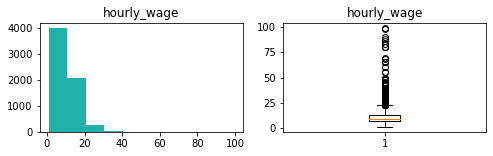

count    6370.000000
mean       10.625885
std         6.393609
min         1.000000
25%         6.500000
50%         9.000000
75%        13.000000
max        99.160000
Name: hourly_wage, dtype: float64


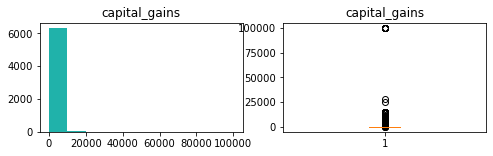

count     6370.000000
mean       442.694819
std       4236.744255
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gains, dtype: float64


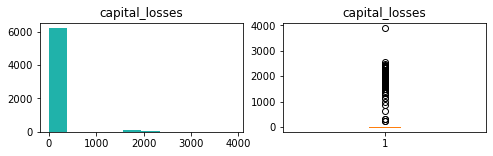

count    6370.000000
mean       45.813658
std       293.171797
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      3900.000000
Name: capital_losses, dtype: float64


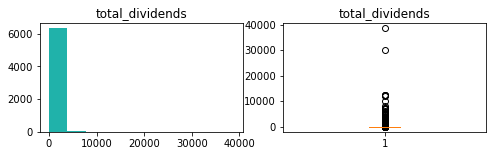

count     6370.000000
mean        86.953218
std        818.558882
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      38758.000000
Name: total_dividends, dtype: float64


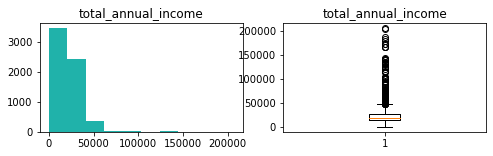

count      6370.000000
mean      22585.676013
std       14285.025610
min          79.000000
25%       13728.000000
50%       18852.400000
75%       27560.000000
max      206252.800000
Name: total_annual_income, dtype: float64


In [24]:
utils.explore_univariate(train, cat_vars, cont_vars)

worker_class vs total_annual_income
-------------------------------


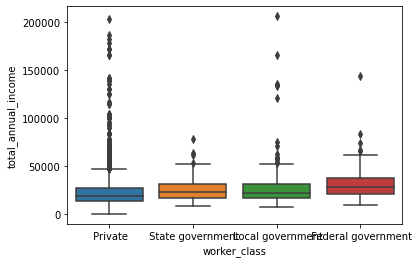

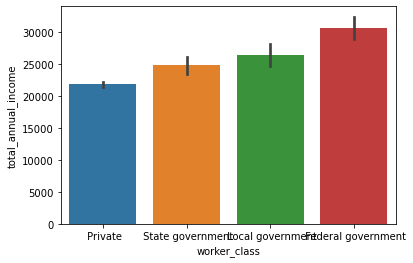

-------------------------------
Mean total_annual_income by worker_class:  
worker_class
 Federal government    30570.908679
 Local government      26352.656000
 Private               21805.873566
 State government      24773.476667
Name: total_annual_income, dtype: float64

education vs total_annual_income
-------------------------------


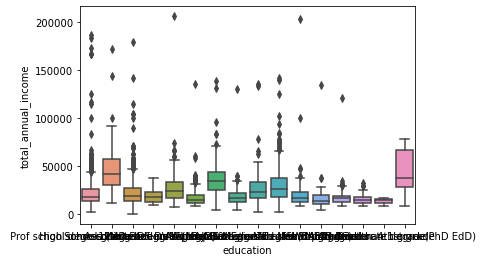

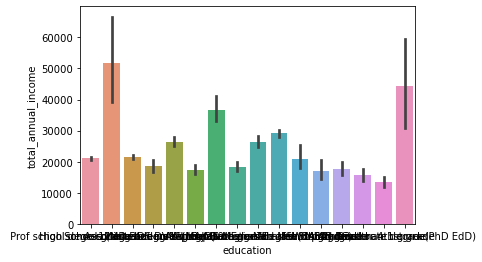

-------------------------------
Mean total_annual_income by education:  
education
 10th grade                                18238.929730
 11th grade                                17422.103509
 12th grade no diploma                     18637.926316
 1st 2nd 3rd or 4th grade                  15700.632432
 5th or 6th grade                          16891.219277
 7th and 8th grade                         20782.912281
 9th grade                                 17513.282243
 Associates degree-academic program        26338.459854
 Associates degree-occup /vocational       26385.957593
 Bachelors degree(BA AB BS)                29088.773668
 Doctorate degree(PhD EdD)                 44496.977778
 High school graduate                      21089.900038
 Less than 1st grade                       13572.000000
 Masters degree(MA MS MEng MEd MSW MBA)    36740.925000
 Prof school degree (MD DDS DVM LLB JD)    51632.911111
 Some college but no degree                21614.201909
Name: total_annual_in

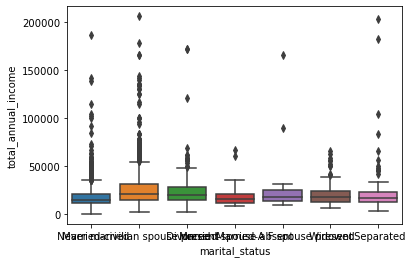

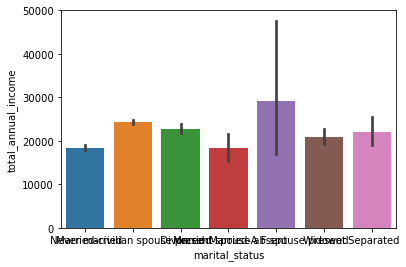

-------------------------------
Mean total_annual_income by marital_status:  
marital_status
 Divorced                           22805.272323
 Married-A F spouse present         29270.140000
 Married-civilian spouse present    24426.922315
 Married-spouse absent              18481.509804
 Never married                      18384.818346
 Separated                          21961.787571
 Widowed                            20838.851899
Name: total_annual_income, dtype: float64

major_occupation_code vs total_annual_income
-------------------------------


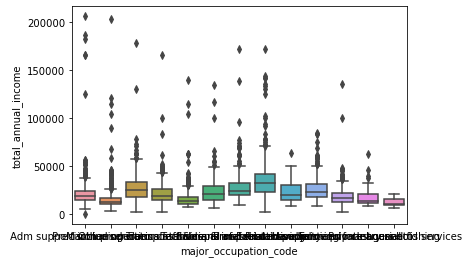

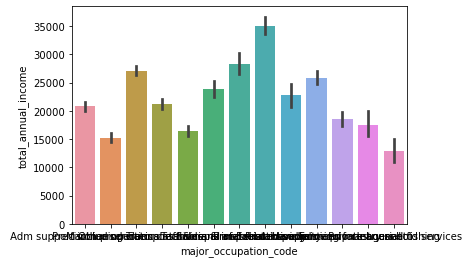

-------------------------------
Mean total_annual_income by major_occupation_code:  
major_occupation_code
 Adm support including clerical           20816.614827
 Executive admin and managerial           25904.623844
 Farming forestry and fishing             17536.963380
 Handlers equip cleaners etc              18521.903364
 Machine operators assmblrs & inspctrs    21252.673638
 Other service                            15134.893567
 Precision production craft & repair      27144.536326
 Private household services               12882.842105
 Professional specialty                   35035.429550
 Protective services                      22798.926126
 Sales                                    16378.368889
 Technicians and related support          28269.908772
 Transportation and material moving       23874.287421
Name: total_annual_income, dtype: float64

race vs total_annual_income
-------------------------------


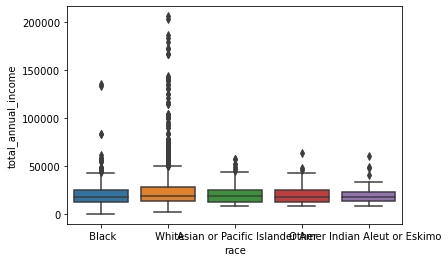

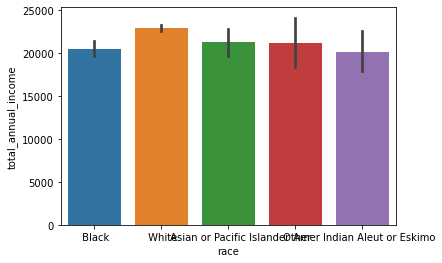

-------------------------------
Mean total_annual_income by race:  
race
 Amer Indian Aleut or Eskimo    20114.049180
 Asian or Pacific Islander      21241.015287
 Black                          20528.689744
 Other                          21191.103125
 White                          22937.539733
Name: total_annual_income, dtype: float64

is_union_member vs total_annual_income
-------------------------------


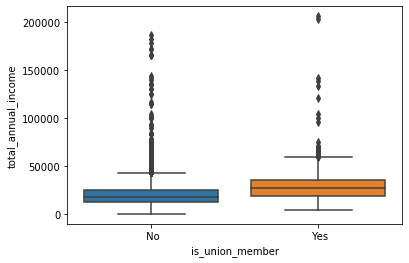

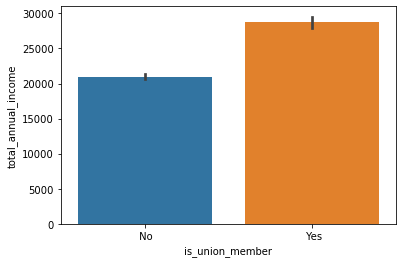

-------------------------------
Mean total_annual_income by is_union_member:  
is_union_member
 No     20993.721722
 Yes    28758.460490
Name: total_annual_income, dtype: float64

region vs total_annual_income
-------------------------------


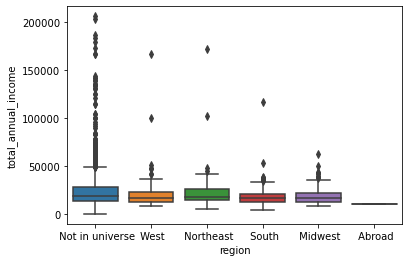

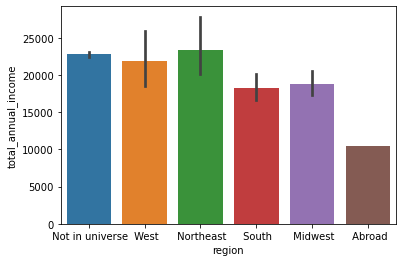

-------------------------------
Mean total_annual_income by region:  
region
 Abroad             10400.000000
 Midwest            18790.254264
 Northeast          23322.245652
 Not in universe    22781.088362
 South              18284.449333
 West               21924.838298
Name: total_annual_income, dtype: float64

state vs total_annual_income
-------------------------------


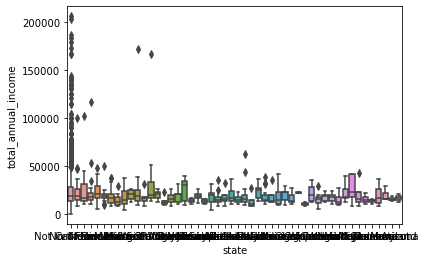

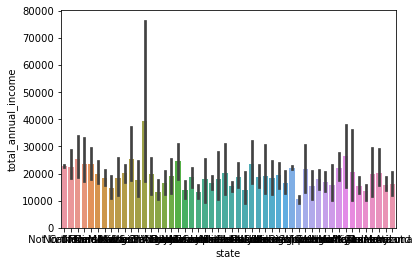

-------------------------------
Mean total_annual_income by state:  
state
 ?                       25191.937931
 Abroad                  13364.000000
 Alabama                 13464.533333
 Alaska                  26416.000000
 Arizona                 16286.400000
 Arkansas                17837.750000
 California              22578.805263
 Colorado                10504.000000
 Connecticut             19905.600000
 Delaware                20280.000000
 District of Columbia    22183.200000
 Florida                 23466.791667
 Georgia                 15433.885714
 Illinois                19011.400000
 Indiana                 16366.217391
 Iowa                    20106.666667
 Kansas                  18181.511111
 Kentucky                17000.000000
 Louisiana               13860.600000
 Maine                   14637.880000
 Maryland                15695.000000
 Massachusetts           17950.400000
 Michigan                22159.109091
 Minnesota               19957.544444
 Mississippi 

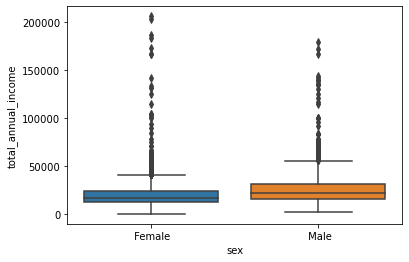

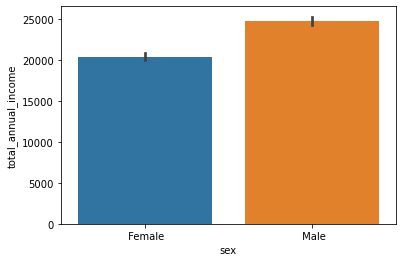

-------------------------------
Mean total_annual_income by sex:  
sex
 Female    20404.122599
 Male      24768.599749
Name: total_annual_income, dtype: float64



In [6]:
utils.explore_bivariate_categorical('total_annual_income', cat_vars, train)

age vs total_annual_income
-------------------------------


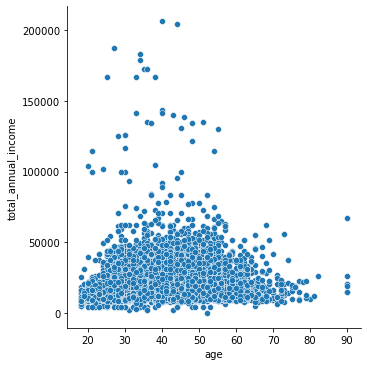

-------------------------------
Correlation between age and total_annual_income:  0.1410620448217601
P value:  1.1330538456315713e-29

hourly_wage vs total_annual_income
-------------------------------


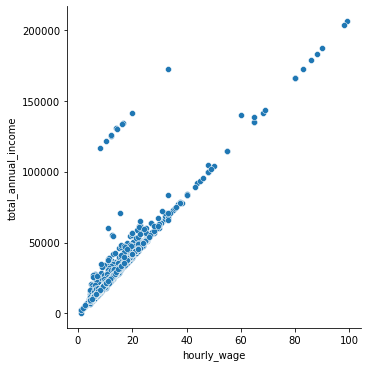

-------------------------------
Correlation between hourly_wage and total_annual_income:  0.9525015047091703
P value:  0.0

capital_gains vs total_annual_income
-------------------------------


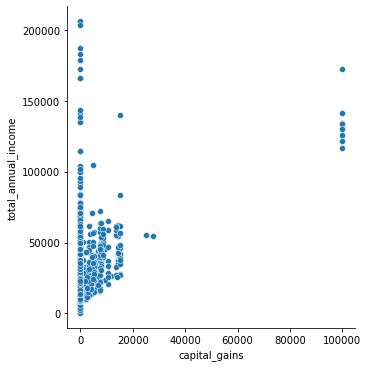

-------------------------------
Correlation between capital_gains and total_annual_income:  0.35929850971738864
P value:  2.043233009253663e-193

capital_losses vs total_annual_income
-------------------------------


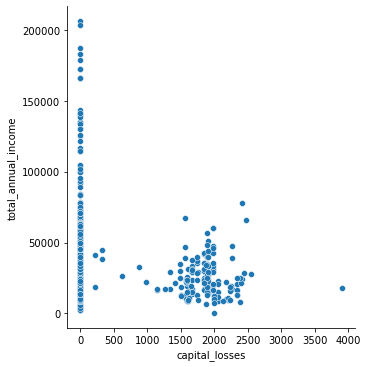

-------------------------------
Correlation between capital_losses and total_annual_income:  0.03508269991371232
P value:  0.005104837421092028

total_dividends vs total_annual_income
-------------------------------


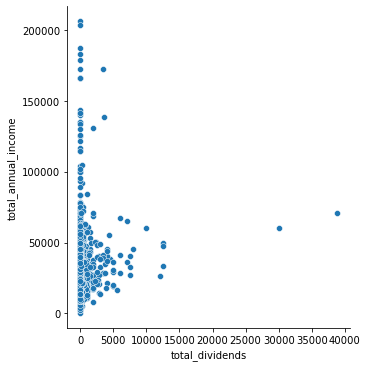

-------------------------------
Correlation between total_dividends and total_annual_income:  0.1295162257515052
P value:  3.0997917126837565e-25

total_annual_income vs total_annual_income
-------------------------------


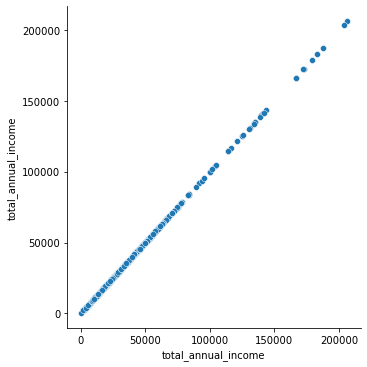

-------------------------------
Correlation between total_annual_income and total_annual_income:  1.0
P value:  0.0



In [7]:
utils.explore_bivariate_continuous('total_annual_income', cont_vars, train)

age vs total_annual_income
-------------------------------


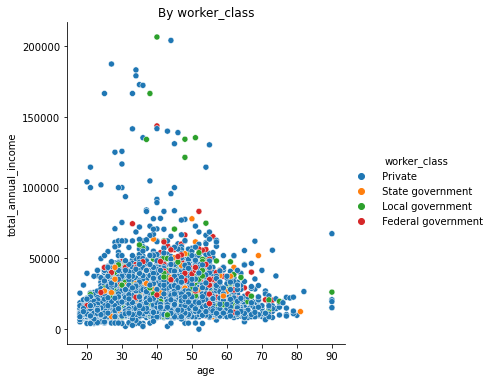

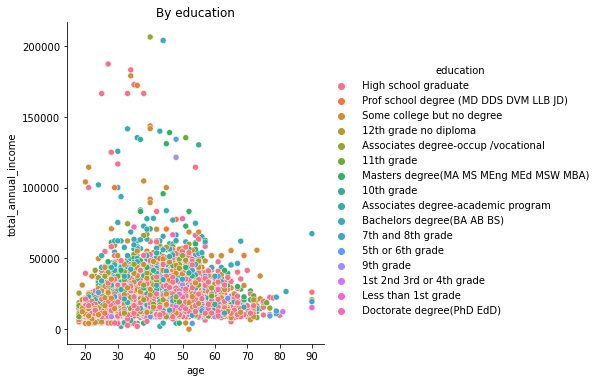

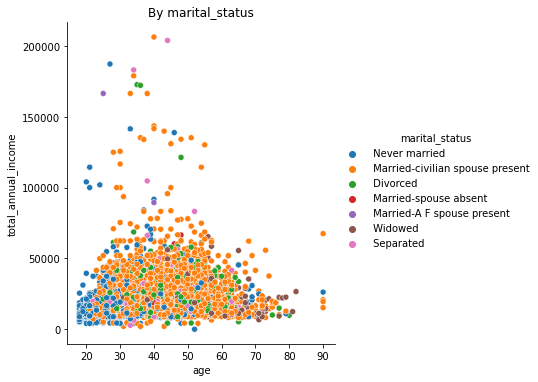

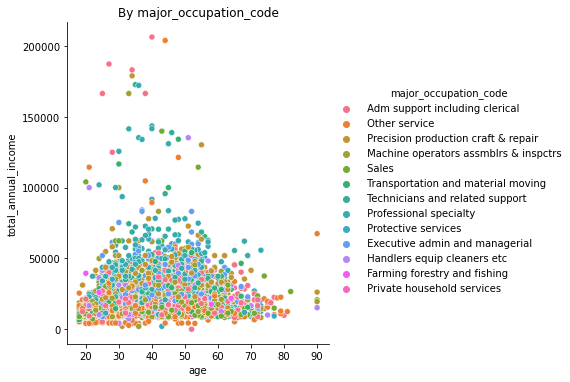

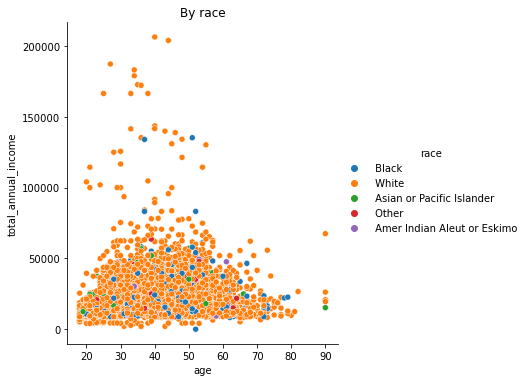

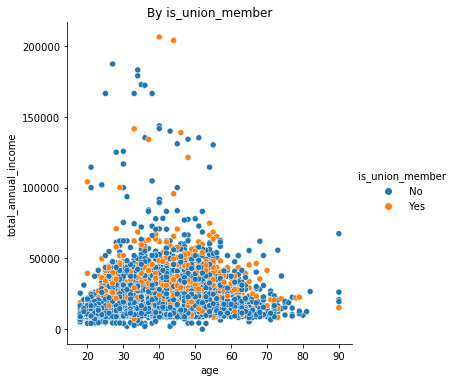

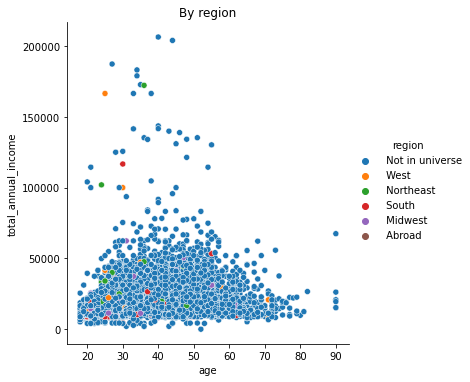

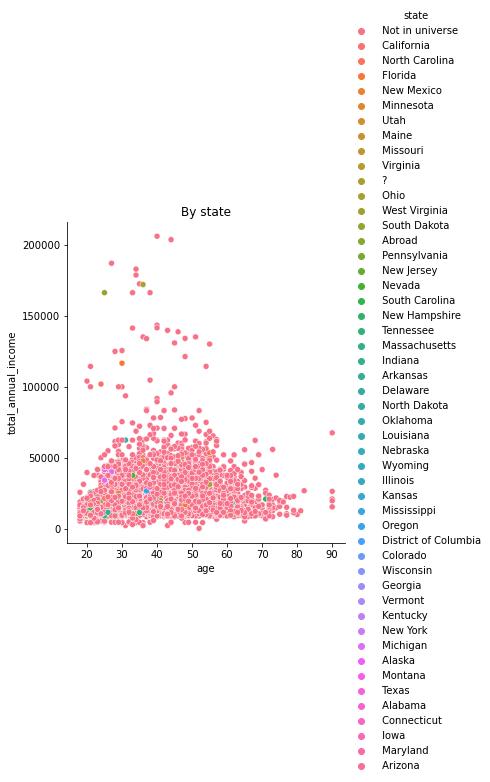

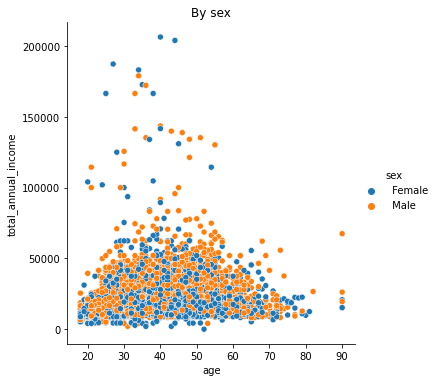


hourly_wage vs total_annual_income
-------------------------------


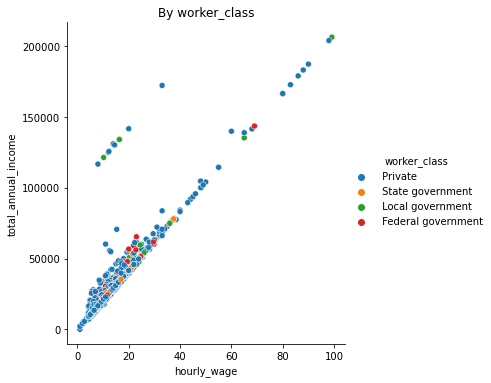

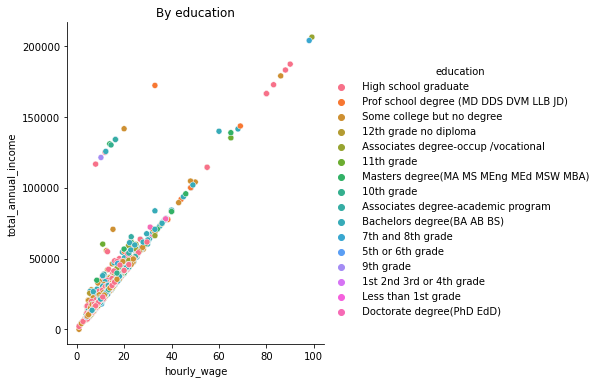

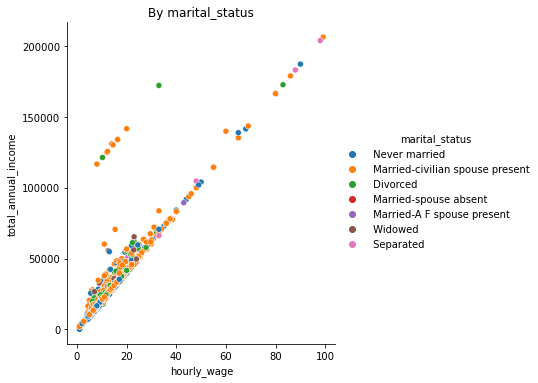

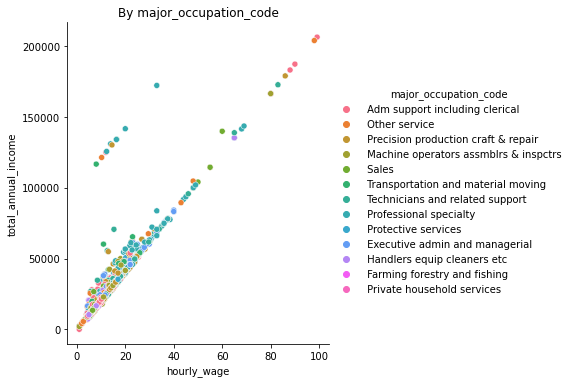

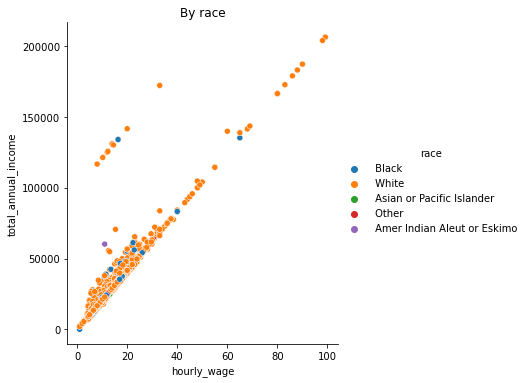

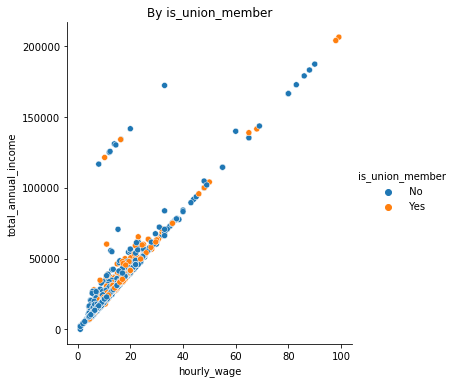

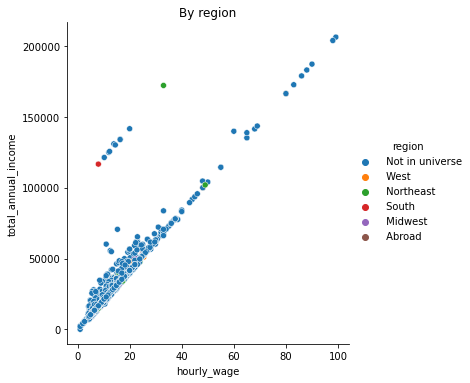

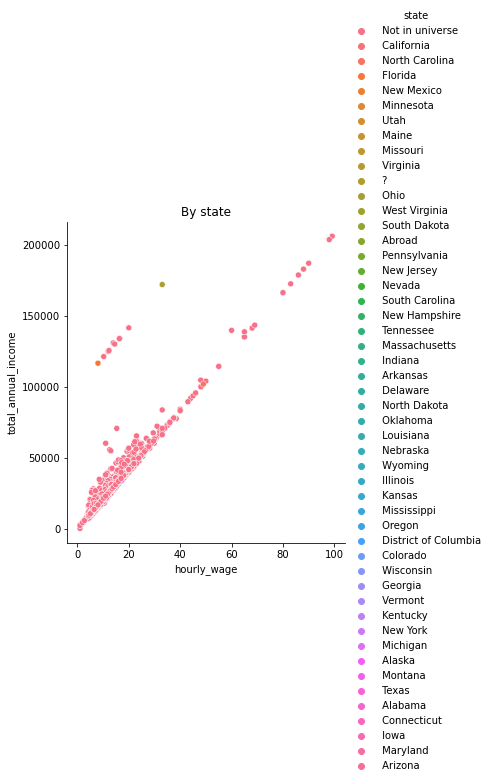

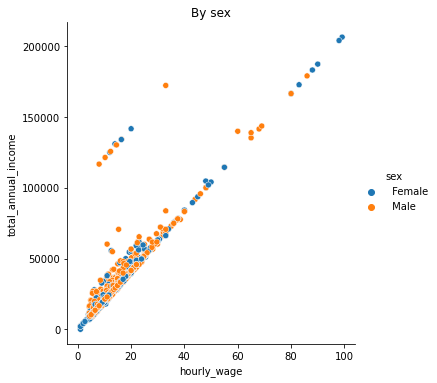


capital_gains vs total_annual_income
-------------------------------


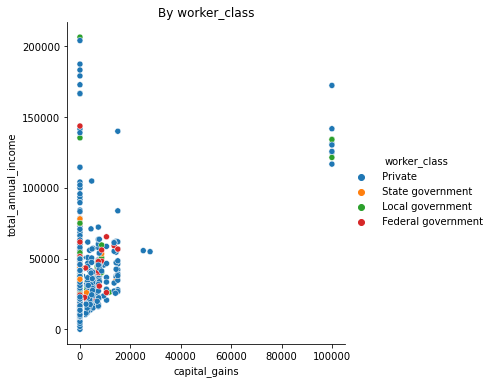

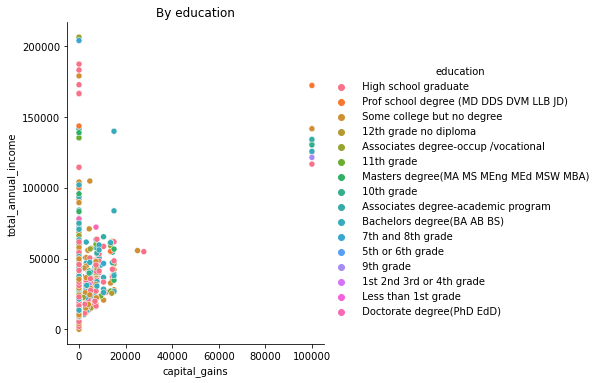

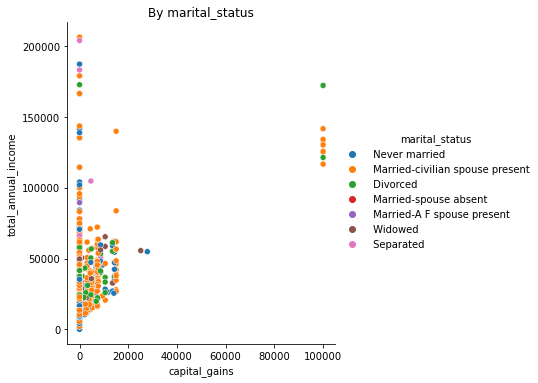

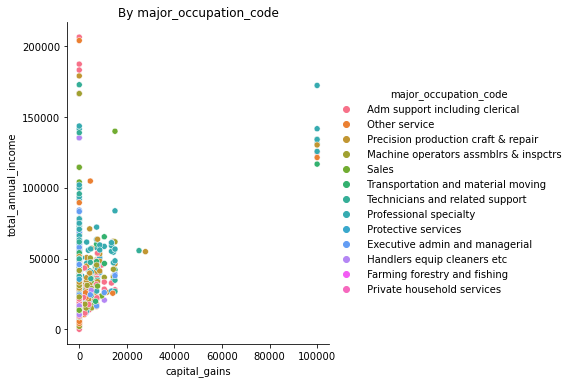

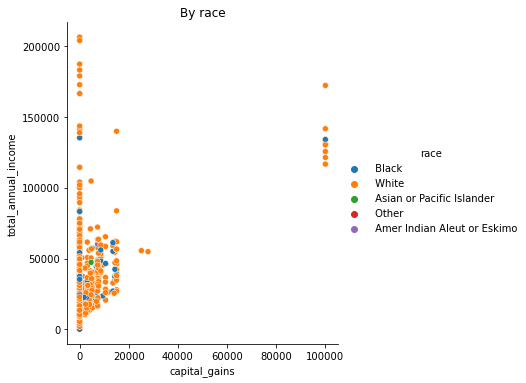

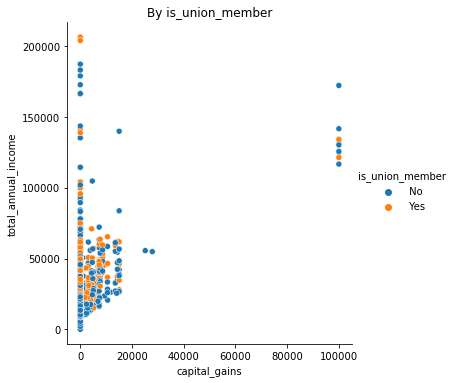

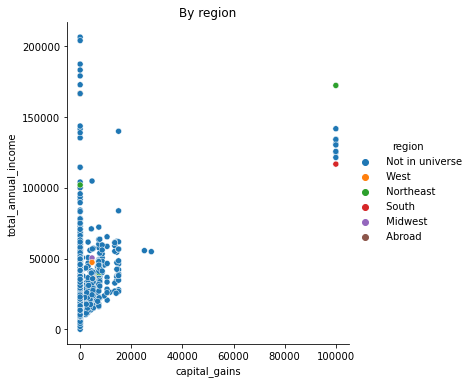

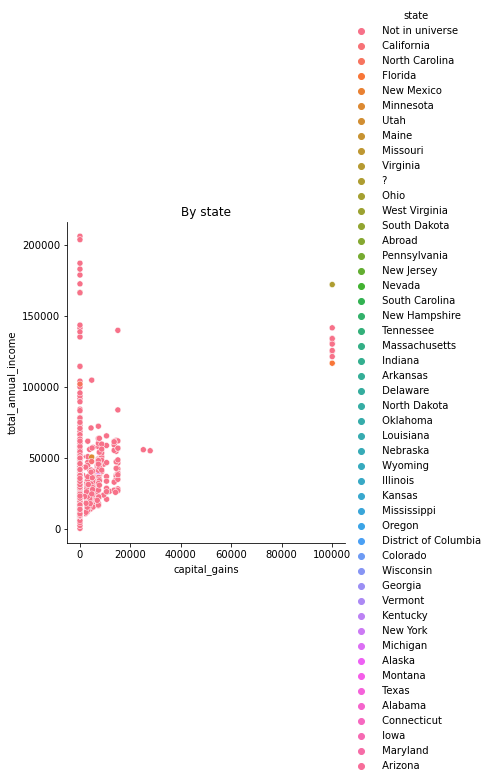

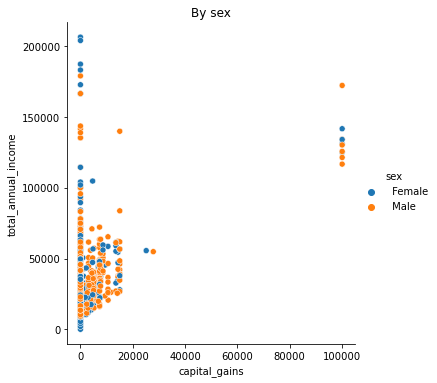


capital_losses vs total_annual_income
-------------------------------


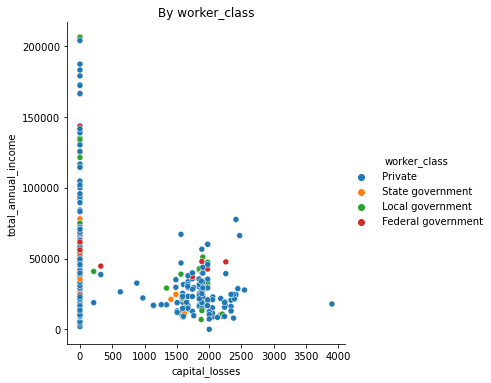

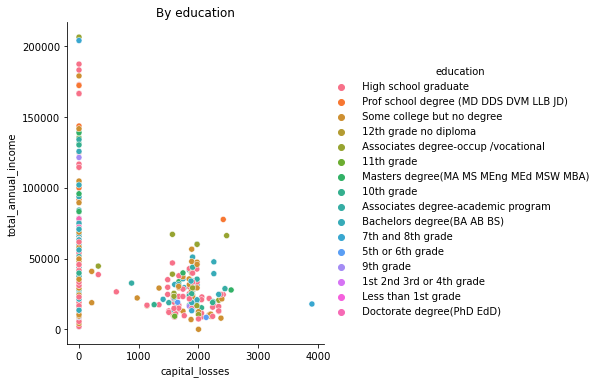

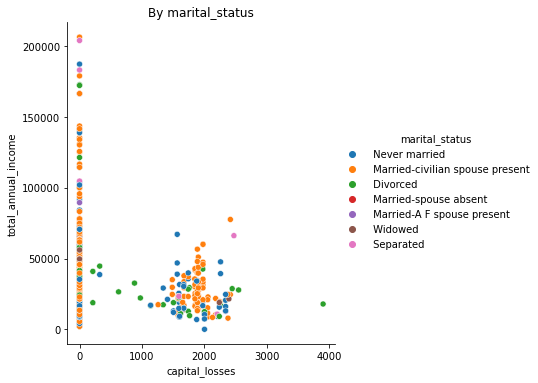

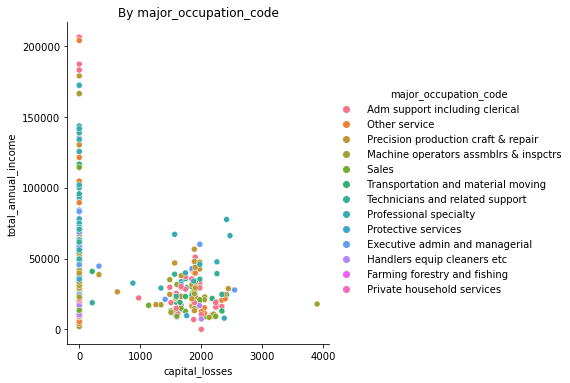

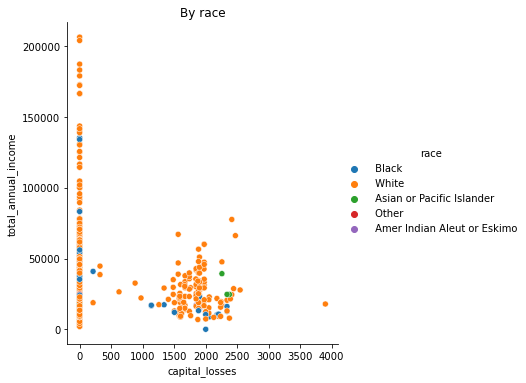

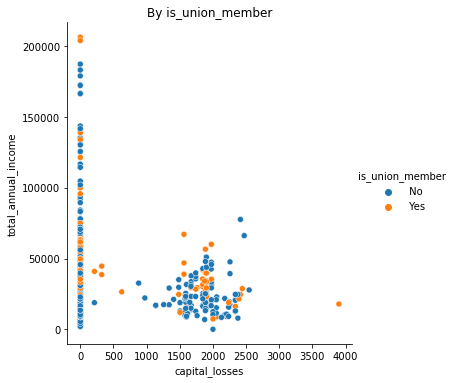

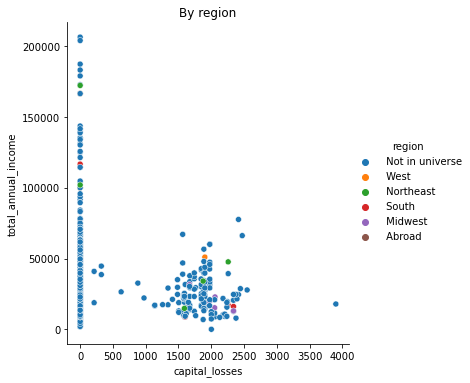

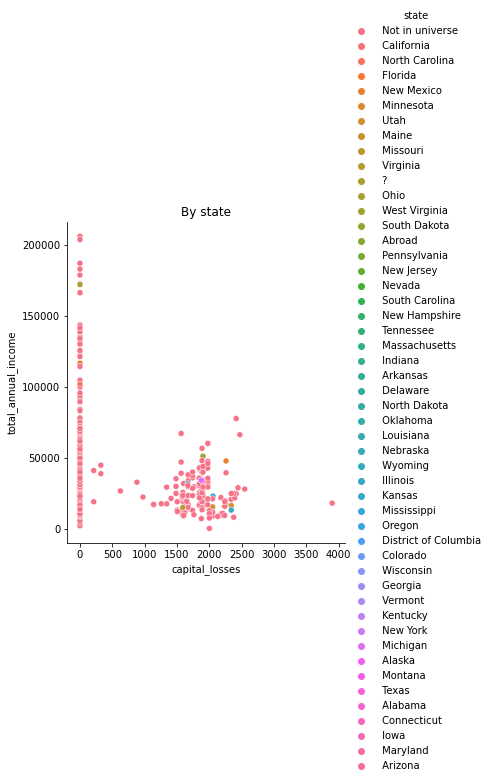

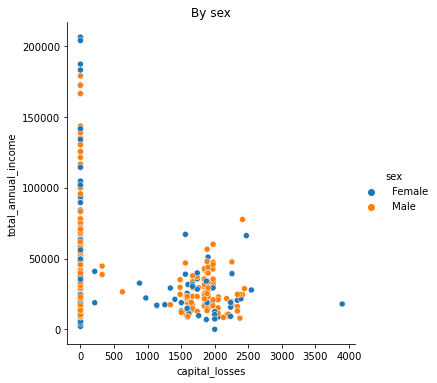


total_dividends vs total_annual_income
-------------------------------


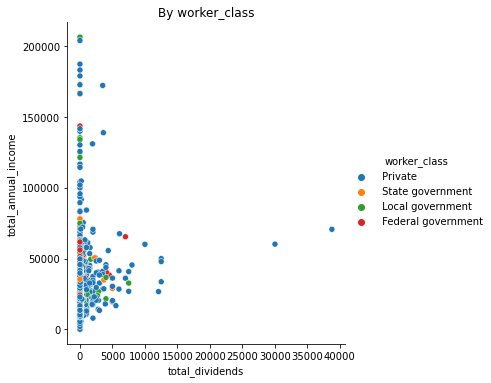

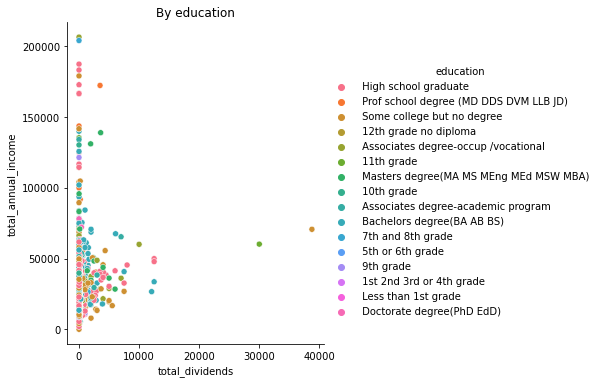

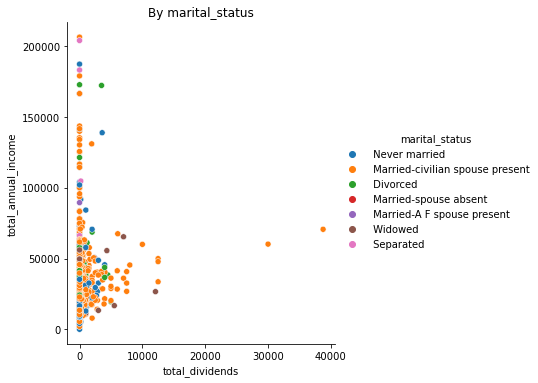

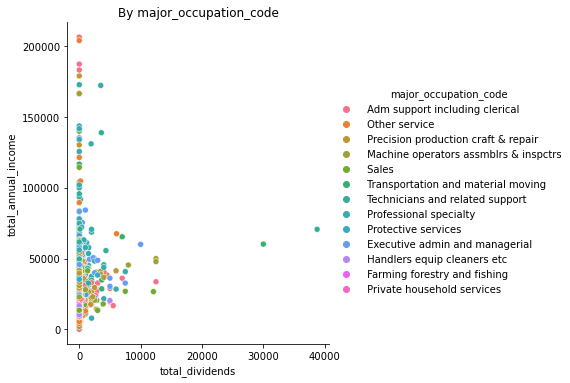

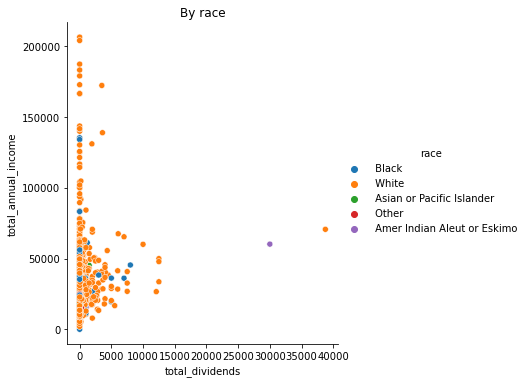

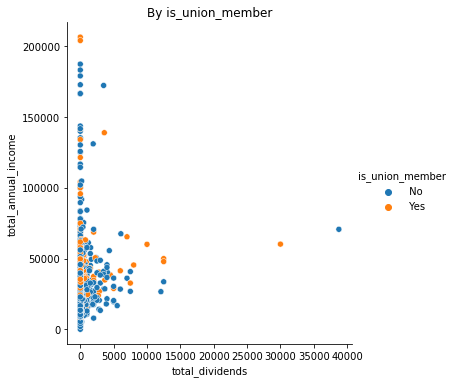

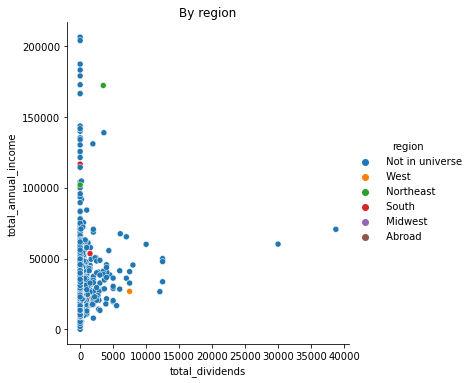

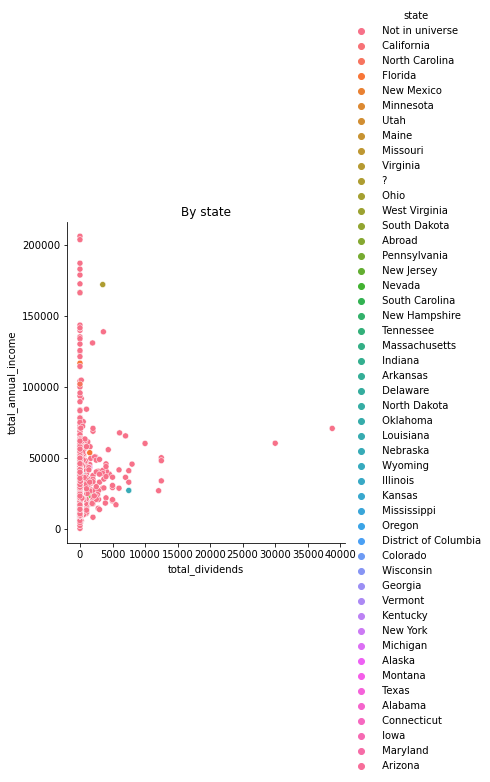

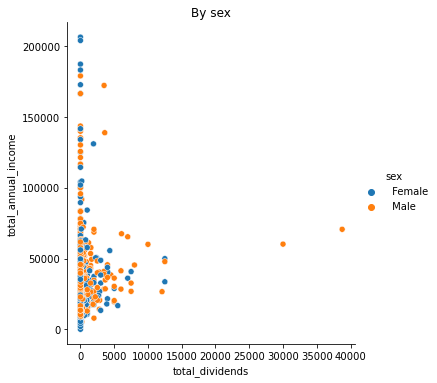


total_annual_income vs total_annual_income
-------------------------------


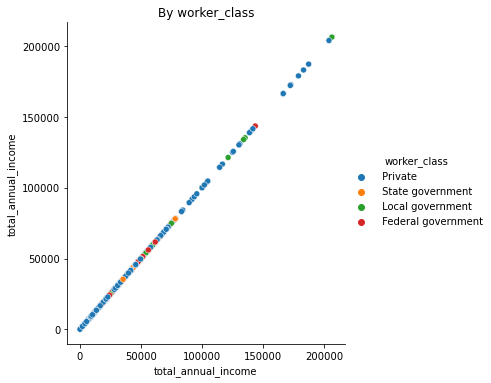

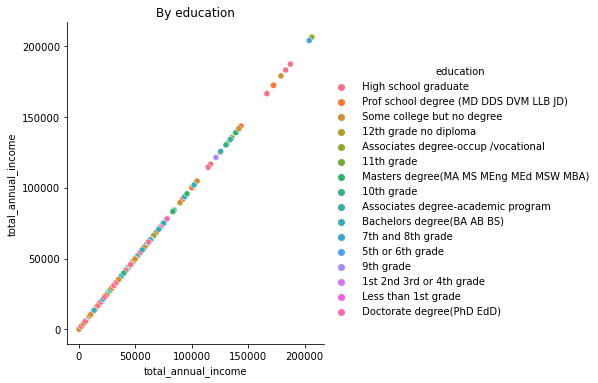

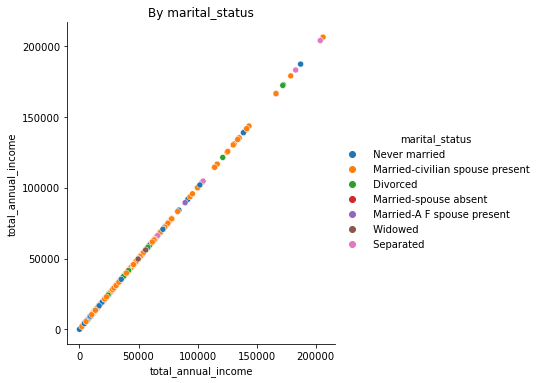

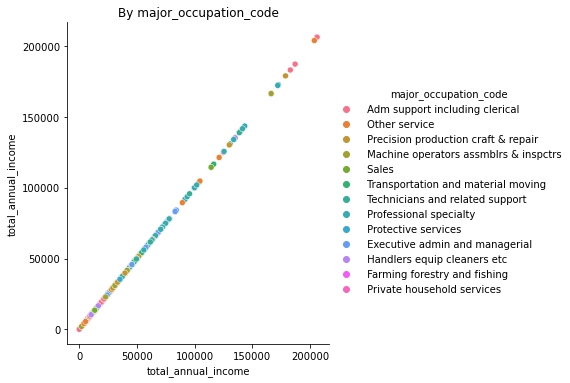

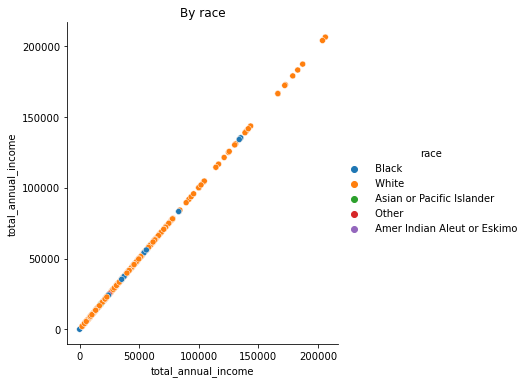

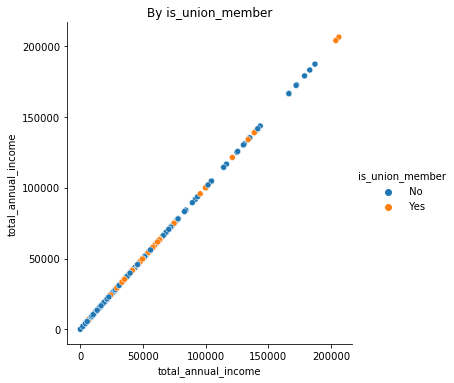

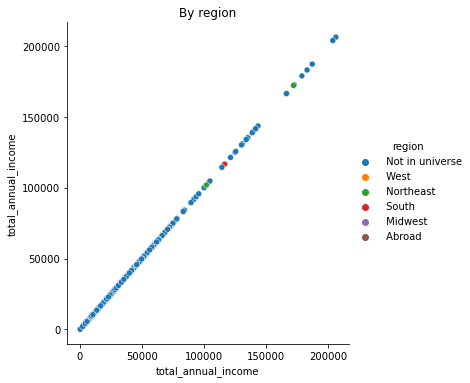

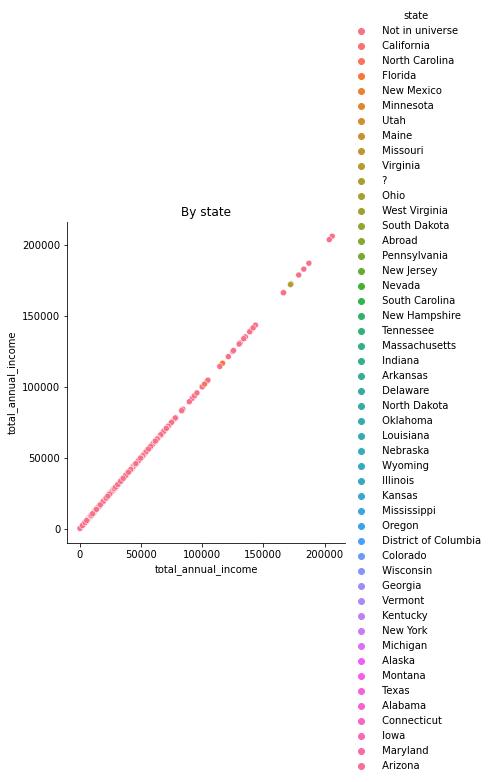

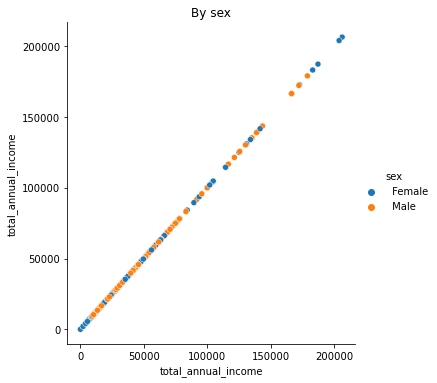

In [8]:
utils.explore_multivariate_(cont_vars, cat_vars, 'total_annual_income', train)

# Hypothesis testing

In [10]:
alpha = .05

1. Do private workers make more on average than the population?
* make new feature on iteration 2 called (is_public)

In [45]:
private = train[train.worker_class.str.strip() == 'Private']

t, p = stats.ttest_1samp(private.total_annual_income, train['total_annual_income'].mean())
utils.evaluate_hypothesis_ttest(p, t, alpha, "greater")

------------------------------------------
t:  -4.156044205890879, p:  3.2877731105213056e-05, a:  0.05

We fail to reject the null hypothesis:  
------------------------------------------


{'t': -4.156044205890879,
 'p': 3.2877731105213056e-05,
 'a': 0.05,
 'message': 'We fail to reject the null hypothesis:  ',
 'reject_null': False}

2. Does sex affect total income?

In [43]:
females = train[train.sex.str.strip() == 'Female']

t, p = stats.ttest_1samp(females.total_annual_income, train['total_annual_income'].mean())
utils.evaluate_hypothesis_ttest(p, t, alpha)

------------------------------------------
t:  -8.923800354655906, p:  7.44255857884641e-19, a:  0.05

We reject the null hypothesis. We move forward with the alternative hypothesis:  
------------------------------------------


{'t': -8.923800354655906,
 'p': 7.44255857884641e-19,
 'a': 0.05,
 'message': 'We reject the null hypothesis. We move forward with the alternative hypothesis:  ',
 'reject_null': True}

3. Does a certain race make more on average than the population?

In [31]:
whites = train[train.race.str.strip() == 'White']

t, p = stats.ttest_1samp(whites.total_annual_income, train['total_annual_income'].mean())
utils.evaluate_hypothesis_ttest(p, t, alpha, "greater")

------------------------------------------
t:  1.7552876755187774, p:  0.07926696960887274, a:  0.05

We reject the null hypothesis. We move forward with the alternative hypothesis:  
------------------------------------------


{'t': 1.7552876755187774,
 'p': 0.07926696960887274,
 'a': 0.05,
 'message': 'We reject the null hypothesis. We move forward with the alternative hypothesis:  ',
 'reject_null': True}

4. Do admin clerks make more than the population average?

In [32]:
admins = train[train.major_occupation_code.str.strip() == 'Adm support including clerical']

t, p = stats.ttest_1samp(admins.total_annual_income, train['total_annual_income'].mean())
utils.evaluate_hypothesis_ttest(p, t, alpha, "greater")

------------------------------------------
t:  -4.719135452078145, p:  2.6374615949190553e-06, a:  0.05

We fail to reject the null hypothesis:  
------------------------------------------


{'t': -4.719135452078145,
 'p': 2.6374615949190553e-06,
 'a': 0.05,
 'message': 'We fail to reject the null hypothesis:  ',
 'reject_null': False}

5. Does being in a union affect total income?

In [46]:
non_union = train[train.is_union_member.str.strip() == 'No']

t, p = stats.ttest_1samp(non_union.total_annual_income, train['total_annual_income'].mean())
utils.evaluate_hypothesis_ttest(p, t, alpha)

------------------------------------------
t:  -8.271347800458871, p:  1.6766262330786776e-16, a:  0.05

We reject the null hypothesis. We move forward with the alternative hypothesis:  
------------------------------------------


{'t': -8.271347800458871,
 'p': 1.6766262330786776e-16,
 'a': 0.05,
 'message': 'We reject the null hypothesis. We move forward with the alternative hypothesis:  ',
 'reject_null': True}

7. Do married workers make more than the population average?

In [47]:
married = train[train.marital_status.str.strip() == 'Married-civilian spouse present']

t, p = stats.ttest_1samp(married.total_annual_income, train['total_annual_income'].mean())
utils.evaluate_hypothesis_ttest(p, t, alpha, "greater")

------------------------------------------
t:  7.812907856456398, p:  7.22904209346986e-15, a:  0.05

We reject the null hypothesis. We move forward with the alternative hypothesis:  
------------------------------------------


{'t': 7.812907856456398,
 'p': 7.22904209346986e-15,
 'a': 0.05,
 'message': 'We reject the null hypothesis. We move forward with the alternative hypothesis:  ',
 'reject_null': True}

8. Does age correlate with annual income?

In [36]:
corr, p = stats.pearsonr(train.age, train.total_annual_income)
utils.evaluate_hypothesis_pcorrelation(corr, p, alpha)

------------------------------------------
corr:  0.1410620448217601, p:  1.1330538456315713e-29, a:  0.05

We reject the null hypothesis. We move forward with the alternative hypothesis:  
Correlation direction:  positive
------------------------------------------


{'corr': 0.1410620448217601,
 'p': 1.1330538456315713e-29,
 'a': 0.05,
 'reject_null': True,
 'message': 'We reject the null hypothesis. We move forward with the alternative hypothesis:  ',
 'correlation': 'positive'}

1. Does private or public affect income?
2. Does sex affect income?
3. Does race affect income?
4. Which occupation makes the most on average?
5. Does belonging to a union affect total annual income?
6. Does having investments affect total annual income?
    * need to make new feature (cannot factor in the figures directly)
7. Does being married affect total annual income?
8. Does age correlate with total annual income?
9. Does education affect total income?
    * second iteration

# Modeling

In [59]:
class_dummies = pd.get_dummies(train.worker_class, drop_first=False)
class_dummies.columns = class_dummies.columns.str.strip()
class_dummies.drop(columns=['Federal government', 'Local government', 'Private',
       'State government'], inplace=True)

In [61]:
sex_dummies = pd.get_dummies(train.sex, drop_first=True)
sex_dummies.columns = sex_dummies.columns.str.strip()

,Male
50080,0
26441,0
11727,1
184270,0
4544,0
...,...
1053,1
189150,1
97202,1
65964,1


In [70]:
race_dummies = pd.get_dummies(train.race, drop_first=False)
race_dummies.columns = race_dummies.columns.str.strip()
race_dummies.drop(columns=['Amer Indian Aleut or Eskimo', 'Asian or Pacific Islander', 'Black', 'Other'], inplace=True)

In [75]:
union_dummies = pd.get_dummies(train.is_union_member, drop_first=True)
union_dummies.columns = union_dummies.columns.str.strip()
union_dummies.rename(columns={'Yes' : 'belongs_to_union'}, inplace=True)

,belongs_to_union
50080,0
26441,0
11727,1
184270,0
4544,0
...,...
1053,0
189150,0
97202,0
65964,0


In [77]:
married_dummies = pd.get_dummies(train.marital_status, drop_first=True)
married_dummies.columns = married_dummies.columns.str.strip()
married_dummies.drop(columns=['Never married', 'Separated', 'Widowed'], inplace=True)

,Married-A F spouse present,Married-civilian spouse present,Married-spouse absent
50080,0,0,0
26441,0,1,0
11727,0,1,0
184270,0,0,0
4544,0,1,0
...,...,...,...
1053,0,1,0
189150,0,0,0
97202,0,1,0
65964,0,1,0


In [79]:
train = pd.concat([train, class_dummies, sex_dummies, race_dummies, union_dummies, married_dummies], axis=1)

In [10]:
train_dupes = train[train.index.value_counts() > 1]
validate_dupes = validate[validate.index.value_counts() > 1]
test_dupes = test[test.index.value_counts() > 1]

In [11]:
train.drop(index=train_dupes.index, inplace=True)
validate.drop(index=validate_dupes.index, inplace=True)
test.drop(index=test_dupes.index, inplace=True)

In [12]:
def encode_categorical_variables(df):
    df = df.copy()
    
    class_dummies = pd.get_dummies(df.worker_class, drop_first=False)
    class_dummies.columns = class_dummies.columns.str.strip()
    class_dummies.drop(columns=['Federal government', 'Local government', 'Private',
       'State government'], inplace=True)
    
    sex_dummies = pd.get_dummies(df.sex, drop_first=True)
    sex_dummies.columns = sex_dummies.columns.str.strip()
    
    race_dummies = pd.get_dummies(df.race, drop_first=False)
    race_dummies.columns = race_dummies.columns.str.strip()
    race_dummies.drop(columns=['Amer Indian Aleut or Eskimo', 'Asian or Pacific Islander', 'Black', 'Other'], inplace=True)
    
    union_dummies = pd.get_dummies(df.is_union_member, drop_first=True)
    union_dummies.columns = union_dummies.columns.str.strip()
    union_dummies.rename(columns={'Yes' : 'belongs_to_union'}, inplace=True)
    
    married_dummies = pd.get_dummies(df.marital_status, drop_first=True)
    married_dummies.columns = married_dummies.columns.str.strip()
    married_dummies.drop(columns=['Never married', 'Separated', 'Widowed'], inplace=True)
    
    return pd.concat([df, class_dummies, sex_dummies, race_dummies, union_dummies, married_dummies], axis=1)

In [13]:
train = encode_categorical_variables(train)
train.shape

(6250, 39)

In [14]:
validate = encode_categorical_variables(validate)
validate.shape

(2713, 39)

In [15]:
test = encode_categorical_variables(test)
test.shape

(2268, 39)

In [16]:
train.columns

Index(['age', 'worker_class', 'education', 'hourly_wage', 'highest_education',
       'marital_status', 'major_industry_code', 'major_occupation_code',
       'race', 'of_hispanic_origin', 'sex', 'is_union_member',
       'unemployed_reason', 'employment_status', 'capital_gains',
       'capital_losses', 'total_dividends', 'tax_filer_status', 'region',
       'state', 'family_status', 'household_summary',
       'lived_in_house_last_year', 'company_size', 'family_members_under_18',
       'country_of_father', 'country_of_mother', 'birth_country',
       'citizenship', 'is_self_employed', 'weeks_worked', 'year',
       'total_annual_income', 'Male', 'White', 'belongs_to_union',
       'Married-A F spouse present', 'Married-civilian spouse present',
       'Married-spouse absent'],
      dtype='object')

In [19]:
non_model_cols = ['worker_class', 'education', 'hourly_wage', 'highest_education', 'marital_status', 'major_industry_code', \
                 'major_occupation_code', 'race', 'of_hispanic_origin', 'sex', 'is_union_member', 'unemployed_reason', \
                 'employment_status', 'capital_gains', 'capital_losses', 'total_dividends', 'tax_filer_status', 'region', 'state',\
                 'family_status', 'household_summary', 'lived_in_house_last_year', 'company_size', 'family_members_under_18',\
                 'country_of_father', 'country_of_mother', 'birth_country', 'citizenship', 'is_self_employed', 'weeks_worked', 'year']

In [20]:
splits = utils.generate_xy_splits(train, validate, test, target='total_annual_income', drop_columns=non_model_cols)

In [21]:
X_train = splits['X_train']
X_validate = splits['X_validate']
X_test = splits['X_test']

y_train = splits['y_train']
y_validate = splits['y_validate']
y_test = splits['y_test']

In [23]:
generate_baseline_model(y_train.total_annual_income.mean(), 'income_mean_pred', 'total_annual_income', y_train, y_validate)

RMSE using income_mean_pred
Train/In-Sample:  14175.3035 
Validate/Out-of-Sample:  14521.1454
--------------------------------------------------
Train
Explained variance:  0.0
R-squared value:  0.0
--------------------------------------------------
Validate
Explained variance:  0.0
R-squared value:  -0.0


In [24]:
generate_baseline_model(y_train.total_annual_income.median(), 'income_median_pred', 'total_annual_income', y_train, y_validate)

RMSE using income_median_pred
Train/In-Sample:  14652.082 
Validate/Out-of-Sample:  14962.412
--------------------------------------------------
Train
Explained variance:  0.0
R-squared value:  -0.0684
--------------------------------------------------
Validate
Explained variance:  0.0
R-squared value:  -0.0617


In [26]:
ols = generate_regression_model(LinearRegression(normalize=True), X_train, X_validate, y_train, y_validate,\
                                'income_pred_lm', 'total_annual_income')

RMSE using income_pred_lm
Train/In-Sample:  13494.7214 
Validate/Out-of-Sample:  13816.9677
--------------------------------------------------
Train
Explained variance:  0.0937
R-squared value:  0.0937
--------------------------------------------------
Validate
Explained variance:  0.0946
R-squared value:  0.0946


In [27]:
lars = generate_regression_model(LassoLars(alpha=1.0), X_train, X_validate, y_train, y_validate,\
                                 'income_pred_lars', 'total_annual_income')

RMSE using income_pred_lars
Train/In-Sample:  13496.1045 
Validate/Out-of-Sample:  13818.3792
--------------------------------------------------
Train
Explained variance:  0.0935
R-squared value:  0.0935
--------------------------------------------------
Validate
Explained variance:  0.0944
R-squared value:  0.0944


In [32]:
glm = generate_regression_model(TweedieRegressor(power=1, alpha=1), X_train, X_validate, y_train, y_validate,\
                                'income_pred_glm', 'total_annual_income')

RMSE using income_pred_glm
Train/In-Sample:  13506.6635 
Validate/Out-of-Sample:  13824.0733
--------------------------------------------------
Train
Explained variance:  0.0921
R-squared value:  0.0921
--------------------------------------------------
Validate
Explained variance:  0.0937
R-squared value:  0.0937


In [34]:
pf = PolynomialFeatures(degree=2)
poly = LinearRegression(normalize=True)

X_train_poly = pf.fit_transform(X_train)
X_validate_poly = pf.transform(X_validate)
X_test_poly = pf.transform(X_test)

poly = generate_regression_model(poly, X_train_poly, X_validate_poly, y_train, y_validate, 'income_pred_poly', 'total_annual_income')

RMSE using income_pred_poly
Train/In-Sample:  13239.7846 
Validate/Out-of-Sample:  13644.2364
--------------------------------------------------
Train
Explained variance:  0.1276
R-squared value:  0.1276
--------------------------------------------------
Validate
Explained variance:  0.1171
R-squared value:  0.1171
